In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import wittgenstein as lw
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import os

import warnings


In [2]:
file_path = os.path.abspath("Balanced_Bankruptcy.csv")
df_prime = pd.read_csv(file_path)

df = df_prime
df = df.drop("Bankrupt?", axis='columns')

#only c values
target = df_prime["Bankrupt?"].to_numpy()
#data without the c
data  = df.to_numpy()



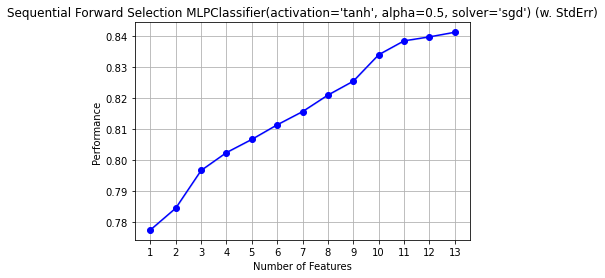

In [20]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

def get_confussion_matrix(mean_of_model,title):
    disp = ConfusionMatrixDisplay(confusion_matrix=mean_of_model)
    disp.plot(cmap='Oranges',values_format='.3g')
    plt.title(f' model: {title}')
    plt.show()
    return

def get_score(modelo, data, target):
    kf = KFold(n_splits=5)
    
    conf_matrix_list_of_arrays = []
    scores = []

    for train_index, test_index in kf.split(data,target):
        trainX, testX = data[train_index], data[test_index]
        trainY, testY = target[train_index], target[test_index]
        model = modelo
        model.fit(trainX, trainY) #confussion Matrix storage for error metrics
        conf_matrix = confusion_matrix(testY, model.predict(testX))
        conf_matrix_list_of_arrays.append(conf_matrix)
        
        scores.append(model.score(testX, testY)) #scores storgae for accuracy value
        
    mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0)
    
    print(f" Accuracy for {modelo} is = {np.average(scores)}")
    return mean_of_conf_matrix_arrays

def wraper(model,x1,y1): 
    sfs = SFS(model,
             k_features=(3,13),
             forward=True,
             floating=False,
             scoring='accuracy',
             cv=0)
    sfs.fit(x1, y1)

    features_chosen_Wrapper= df.columns[1:][list(sfs.k_feature_idx_)]

    #print(features_chosen_Wrapper)
    fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
    plt.title(f'Sequential Forward Selection {model} (w. StdErr)')
    plt.grid()
    plt.show()
    
    return features_chosen_Wrapper

#algorithm = KNeighborsClassifier(n_neighbors=3)
#algorithm = lw.RIPPER()
#algorithm = SVC(gamma='auto')
#algorithm = DecisionTreeClassifier()
algorithm = MLPClassifier(activation='tanh', solver='sgd', alpha=0.5)

wrapper_features = wraper(algorithm, data, target)

warnings.filterwarnings('ignore')

In [21]:
kk = pd.DataFrame(wrapper_features)
kk

,0
0,ROA(A) before interest and % after tax
1,ROA(B) before interest and depreciation after...
2,Operating Gross Margin
3,Non-industry income and expenditure/revenue
4,Net Value Per Share (B)
5,Net worth/Assets
6,Operating profit/Paid-in capital
7,Current Assets/Total Assets
8,Quick Assets/Current Liability
9,Current Liability to Assets


 Accuracy for MLPClassifier(activation='tanh', alpha=0.5, solver='sgd') is = 0.7801654091042984


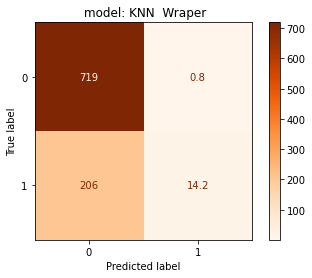

In [22]:
WRAPPER2 = df[wrapper_features]

X= WRAPPER2.to_numpy()
y = target

RIPPER_matrix4 = get_score(algorithm,X, y)
get_confussion_matrix(RIPPER_matrix4, title = "  Wraper")

warnings.filterwarnings('ignore')